In [11]:
import trimesh

# Cargar el archivo .OBJ
scene_or_mesh = trimesh.load("modelo.obj")

# Si es una escena con múltiples geometrías
if isinstance(scene_or_mesh, trimesh.Scene):
    print("Se cargó una escena con múltiples objetos.")
    mesh = scene_or_mesh.to_geometry()  # ✅ forma recomendada
else:
    mesh = scene_or_mesh  # ya es una sola malla

# Mostrar información estructural
print("Vértices:", mesh.vertices.shape)
print("Caras:", mesh.faces.shape)

Se cargó una escena con múltiples objetos.
Vértices: (28240, 3)
Caras: (35384, 3)


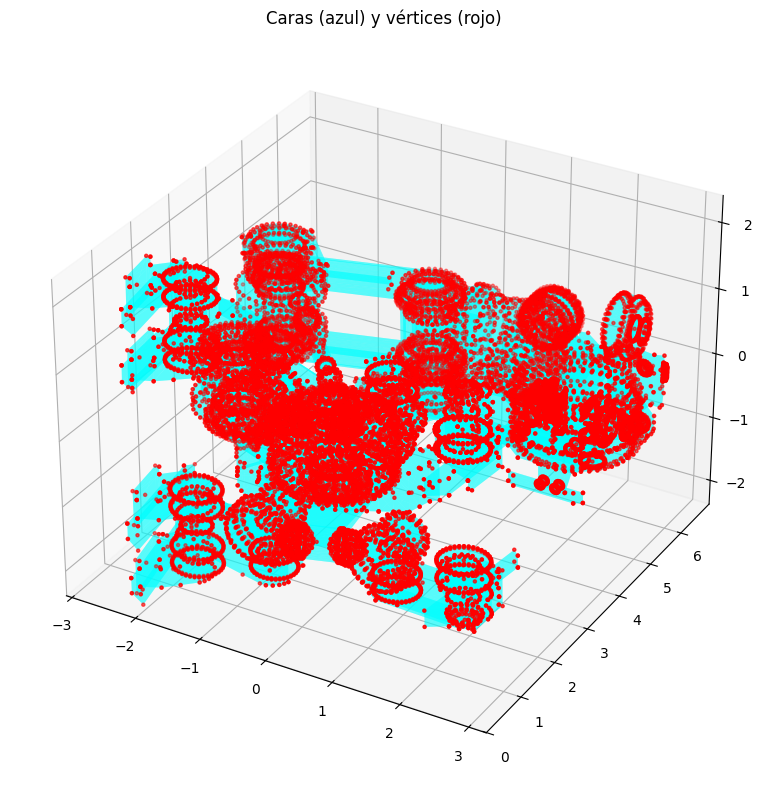

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar caras
collection = Poly3DCollection(mesh.vertices[mesh.faces], alpha=0.4, facecolor='cyan')
ax.add_collection3d(collection)

# Dibujar vértices
ax.scatter(mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2], color='red', s=5)

# Configurar ejes
ax.set_title("Caras (azul) y vértices (rojo)")
ax.set_xlim(*mesh.bounds[:, 0])
ax.set_ylim(*mesh.bounds[:, 1])
ax.set_zlim(*mesh.bounds[:, 2])
plt.tight_layout()
plt.show()


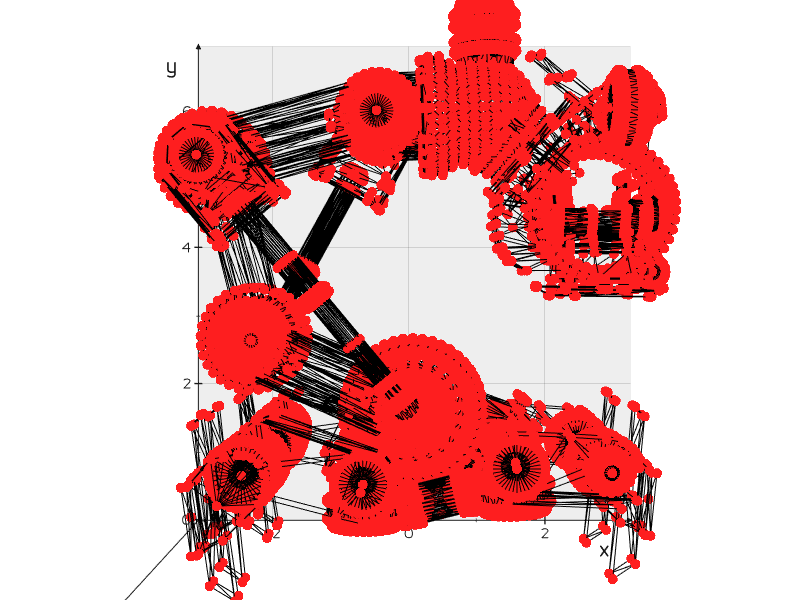

In [14]:
from vedo import Mesh, Points, show

# Cargar con vedo directamente
vmesh = Mesh("modelo.obj")

# Mostrar vértices
puntos = Points(vmesh.points, r=10, c='red')

# Mostrar aristas como wireframe
wire = vmesh.clone().wireframe().c('black')

# Mostrar todo junto
show(wire, puntos, axes=1)

In [19]:
!pip install imageio

Defaulting to user installation because normal site-packages is not writeable


In [23]:
from vedo import Mesh, Plotter
import imageio.v2 as imageio  # ✅ cambio aquí
import os

vmesh = Mesh("modelo.obj")

vp = Plotter(offscreen=True)
vp.show(vmesh, axes=1, viewup="z")

frames = []
for angle in range(0, 360, 10):
    vmesh.rotate(angle=10, axis=[0, 0, 1])  # ✅ rotar en Z
    vp.show(vmesh, resetcam=False)
    filename = f"frame_{angle}.png"
    vp.screenshot(filename)
    frames.append(filename)

# Crear GIF
with imageio.get_writer("rotacion.gif", mode='I', duration=0.1) as writer:
    for f in frames:
        writer.append_data(imageio.imread(f))  # ✅ sin warnings
        os.remove(f)

print("🎉 GIF creado exitosamente como rotacion.gif")

🎉 GIF creado exitosamente como rotacion.gif
